In [85]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [86]:
df = pd.read_csv("Training_DU_Clustering1.csv", skipinitialspace=True, sep=',')
df

,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,MMRCurrentAuctionAveragePrice,MMRCurrentRetailAveragePrice,VehBCost,WarrantyCost,TotalPrice,Cost/Odometer
0,2001,8,1.0,55117,3192.0,3947.0,3192.0,3947.0,4315.0,1054,5369.0,0.078288
1,2001,8,1.0,55117,3192.0,3947.0,3192.0,3947.0,4315.0,1054,5369.0,0.078288
2,2006,3,1.0,72728,12423.0,13917.0,13721.0,15319.0,10835.0,920,11755.0,0.148980
3,2006,3,1.0,80650,13271.0,14833.0,12982.0,18542.0,11515.0,983,12498.0,0.142777
4,2006,3,1.0,80650,13271.0,14833.0,12982.0,18542.0,11515.0,983,12498.0,0.142777
5,2002,8,1.0,87788,5286.0,8768.0,5503.0,8901.0,9110.0,1283,10393.0,0.103773
6,2002,7,1.0,58350,5617.0,6566.0,5617.0,6566.0,6455.0,1054,7509.0,0.110626
7,2002,7,1.0,87034,3499.0,4279.0,3499.0,4279.0,8985.0,1283,10268.0,0.103236
8,2002,7,1.0,74233,3499.0,4279.0,3942.0,6841.0,8100.0,1220,9320.0,0.109116
9,2002,7,1.0,79561,3544.0,4328.0,5120.0,8233.0,7785.0,1220,9005.0,0.097849


## Inizio analisi

In [3]:
columns=['VehicleAge','VehOdo','MMRAcquisitionAuctionAveragePrice','VehBCost', 'WarrantyCost','Cost/Odometer']
pdf=df[columns]
pdf.head()

,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,VehBCost,WarrantyCost,Cost/Odometer
0,8,55117,3192.0,4315.0,1054,0.078288
1,8,55117,3192.0,4315.0,1054,0.078288
2,3,72728,12423.0,10835.0,920,0.148980
3,3,80650,13271.0,11515.0,983,0.142777
4,3,80650,13271.0,11515.0,983,0.142777


### Normalization

In [4]:
scaler = StandardScaler()
scaler.fit(pdf.head().values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [5]:
X = scaler.fit_transform(pdf.values)

In [6]:
X[:5]

array([[ 2.1922116 , -1.100717  , -1.22599591, -1.32566803, -0.35055362,
        -0.47784656],
       [ 2.1922116 , -1.100717  , -1.22599591, -1.32566803, -0.35055362,
        -0.47784656],
       [-0.67580252,  0.10297554,  2.61126674,  2.33864554, -0.5688778 ,
         1.13845268],
       [-0.67580252,  0.64443556,  2.96377446,  2.72081322, -0.46623285,
         0.99664242],
       [-0.67580252,  0.64443556,  2.96377446,  2.72081322, -0.46623285,
         0.99664242]])

#### Knee Method to estimate the best K

In [7]:
sse_list = list()
max_k = 50
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=20, max_iter=150)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

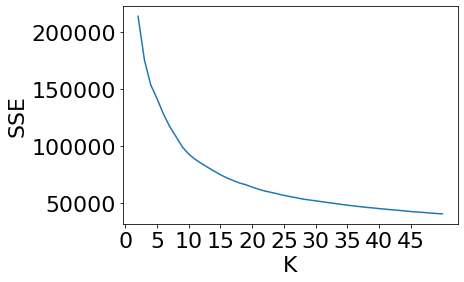

In [8]:
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.xticks(np.arange(0, 50, 5))
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

## Fast tests with different values of K [2, 15]

### K=15

In [9]:
kmeans = KMeans(n_clusters=15, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=15, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
SSE1= 'SSE %s' % kmeans.inertia_
SILH1='Silhouette %s' % silhouette_score(X, kmeans.labels_)
print(SSE1)
print(SILH1)

SSE 74745.28149586057
Silhouette 0.2081738064902567


### K=14

In [11]:
kmeans = KMeans(n_clusters=14, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=14, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
SSE2= 'SSE %s' % kmeans.inertia_
SILH2='Silhouette %s' % silhouette_score(X, kmeans.labels_)
print(SSE2)
print(SILH2)

SSE 77947.68457969632
Silhouette 0.21049800836381355


### K=13

In [13]:
kmeans = KMeans(n_clusters=13, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=13, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
SSE3= 'SSE %s' % kmeans.inertia_
SILH3='Silhouette %s' % silhouette_score(X, kmeans.labels_)
print(SSE3)
print(SILH1)

SSE 81233.00255699718
Silhouette 0.2081738064902567


### K=12

In [15]:
kmeans = KMeans(n_clusters=12, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=12, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
SSE4= 'SSE %s' % kmeans.inertia_
SILH4='Silhouette %s' % silhouette_score(X, kmeans.labels_)
print(SSE4)
print(SILH4)

SSE 84752.51515350946
Silhouette 0.20383804173449227


### K=11

In [17]:
kmeans = KMeans(n_clusters=11, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=11, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
SSE5= 'SSE %s' % kmeans.inertia_
SILH5='Silhouette %s' % silhouette_score(X, kmeans.labels_)
print(SSE5)
print(SILH5)

SSE 88343.93644533158
Silhouette 0.21383404808234466


### K=10

In [19]:
kmeans = KMeans(n_clusters=10, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=10, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
SSE6= 'SSE %s' % kmeans.inertia_
SILH6='Silhouette %s' % silhouette_score(X, kmeans.labels_)
print(SSE6)
print(SILH6)

SSE 92925.5674773822
Silhouette 0.2165013402113199


### K=9

In [21]:
kmeans = KMeans(n_clusters=9, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=9, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
SSE7= 'SSE %s' % kmeans.inertia_
SILH7='Silhouette %s' % silhouette_score(X, kmeans.labels_)
print(SSE7)
print(SILH7)

SSE 99058.99489727101
Silhouette 0.21972303082480113


### K=8

In [23]:
kmeans = KMeans(n_clusters=8, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=8, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
SSE8= 'SSE %s' % kmeans.inertia_
SILH8='Silhouette %s' % silhouette_score(X, kmeans.labels_)
print(SSE8)
print(SILH8)

SSE 107797.87365081203
Silhouette 0.2093475046454541


### K=7

In [25]:
kmeans = KMeans(n_clusters=7, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=7, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
SSE9= 'SSE %s' % kmeans.inertia_
SILH9='Silhouette %s' % silhouette_score(X, kmeans.labels_)
print(SSE9)
print(SILH9)

SSE 117004.31806413675
Silhouette 0.22440445801036651


### K=6

In [27]:
kmeans = KMeans(n_clusters=6, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=6, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
SSE10= 'SSE %s' % kmeans.inertia_
SILH10='Silhouette %s' % silhouette_score(X, kmeans.labels_)
print(SSE10)
print(SILH10)

SSE 128203.07627433927
Silhouette 0.2191721210498418


### K=5

In [29]:
kmeans = KMeans(n_clusters=5, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=5, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
SSE11= 'SSE %s' % kmeans.inertia_
SILH11='Silhouette %s' % silhouette_score(X, kmeans.labels_)
print(SSE11)
print(SILH11)

SSE 140444.65416390196
Silhouette 0.23568875222683316


### K=4

In [31]:
kmeans = KMeans(n_clusters=4, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=4, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [32]:
SSE12= 'SSE %s' % kmeans.inertia_
SILH12='Silhouette %s' % silhouette_score(X, kmeans.labels_)
print(SSE12)
print(SILH12)

SSE 153758.52325740762
Silhouette 0.23599376004066727


### K=3

In [33]:
kmeans = KMeans(n_clusters=3, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [34]:
SSE13= 'SSE %s' % kmeans.inertia_
SILH13='Silhouette %s' % silhouette_score(X, kmeans.labels_)
print(SSE13)
print(SILH13)

SSE 175860.1448426153
Silhouette 0.2645394019647023


### K=2

In [35]:
kmeans = KMeans(n_clusters=2, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=2, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [36]:
SSE14= 'SSE %s' % kmeans.inertia_
SILH14='Silhouette %s' % silhouette_score(X, kmeans.labels_)
print(SSE14)
print(SILH14)

SSE 214009.5341268151
Silhouette 0.2777538419940724


## Confronto SSE

In [37]:
print('1.', SSE1)
print('2.', SSE2 , 'Best value')
print('3.', SSE3)
print('4.', SSE4)
print('5.', SSE5)
print('6.', SSE6)
print('7.', SSE7)
print('8.', SSE8)
print('9.', SSE9)
print('10.', SSE10)
print('11.', SSE11)
print('12.', SSE12)
print('13.', SSE13)
print('14.', SSE14)

1. SSE 74745.28149586057
2. SSE 77947.68457969632 Best value
3. SSE 81233.00255699718
4. SSE 84752.51515350946
5. SSE 88343.93644533158
6. SSE 92925.5674773822
7. SSE 99058.99489727101
8. SSE 107797.87365081203
9. SSE 117004.31806413675
10. SSE 128203.07627433927
11. SSE 140444.65416390196
12. SSE 153758.52325740762
13. SSE 175860.1448426153
14. SSE 214009.5341268151


## Confronto Silhouette

In [38]:
print('1.', SILH1)
print('2.', SILH2)
print('3.', SILH3)
print('4.', SILH4)
print('5.', SILH5)
print('6.', SILH6)
print('7.', SILH7)
print('8.', SILH8)
print('9.', SILH9)
print('10.', SILH10)
print('11.', SILH11)
print('12.', SILH12)
print('13.', SILH13)
print('14.', SILH14, 'Best value')

1. Silhouette 0.2081738064902567
2. Silhouette 0.21049800836381355
3. Silhouette 0.2097086176374637
4. Silhouette 0.20383804173449227
5. Silhouette 0.21383404808234466
6. Silhouette 0.2165013402113199
7. Silhouette 0.21972303082480113
8. Silhouette 0.2093475046454541
9. Silhouette 0.22440445801036651
10. Silhouette 0.2191721210498418
11. Silhouette 0.23568875222683316
12. Silhouette 0.23599376004066727
13. Silhouette 0.2645394019647023
14. Silhouette 0.2777538419940724 Best value


Dominio SSE [78005.95, 214009.65]

Dominio Silhouette [0.208052, 0.277741]

In [39]:
SSE=[107797.53105636366, 78005.95192563818, 81232.92455643539, 84660.92505392099, 88343.89771829594, 92924.68023362091, \
     99058.85196547693, 107797.53105636366, 117004.12809579389, 128202.65403720133, 140442.86643136264, 153758.63516502632,\
     175860.04271784204, 214009.6457078526]
Silhouette=[0.20942316418881757, 0.20805264589955205, 0.21018796968186035, 0.21346124361694258, 0.2138424872907317,\
            0.21664396513507286, 0.21972555581919923, 0.20942316418881757, 0.22432138122867168, 0.21882016379608465,\
            0.23597647650345072, 0.23600296582171348, 0.2645365356170817, 0.27774176718507365]

In [40]:
import statistics

SSE.sort() 
Silhouette.sort()

m1=statistics.median_low(SSE) 
m2=statistics.median_high(Silhouette)
print('La mediana del SSE è: ', m1,)
print('La mediana della Silhouette è: ', m2)

La mediana del SSE è:  107797.53105636366
La mediana della Silhouette è:  0.21882016379608465


In [41]:
me1=statistics.mean(SSE)
me2=statistics.mean(Silhouette)
print('Valore medio per SSE: ',me1)
print('Valore medio per Silhouette: ', me2)

Valore medio per SSE:  119221.44755151389
Valore medio per Silhouette:  0.22558282042664785


In [42]:
for sse in SSE:
    if sse>=107797.53105636366 and sse<=119221.44755151389:
        print (sse)
    else:
        continue

107797.53105636366
107797.53105636366
117004.12809579389


In [43]:
for silh in Silhouette:
    if silh>=0.21882016379608465 and silh<=0.22558282042664785:
        print (silh)
    else:
        continue

0.21882016379608465
0.21972555581919923
0.22432138122867168


Gli SSE si riferiscono al cluster 1, 8 e 9.
Per la silhouette invece ai cluster 6, 9 e 10.
Di conseguenza la migliore combinazione dei due indici è il cluster 9, che si riferisce al valore di K=7, che adesso andremo ad analizzare in maniera più dettagliata.

# Analisi K=7

In [53]:
kmeans = KMeans(n_clusters=7, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=7, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [54]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 10480, 1: 12966, 2: 6670, 3: 3602, 4: 10280, 5: 4, 6: 6904}

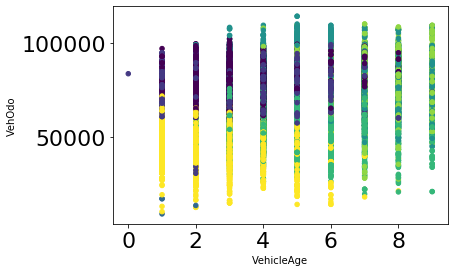

In [46]:
plt.scatter(pdf['VehicleAge'], pdf['VehOdo'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehicleAge')
plt.ylabel('VehOdo')
plt.show()

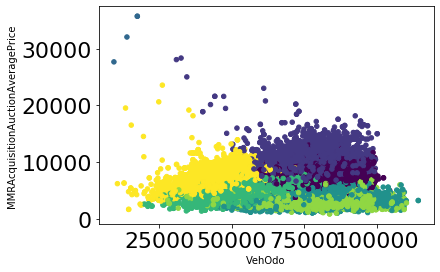

In [47]:
plt.scatter(pdf['VehOdo'], pdf['MMRAcquisitionAuctionAveragePrice'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehOdo')
plt.ylabel('MMRAcquisitionAuctionAveragePrice')
plt.show()

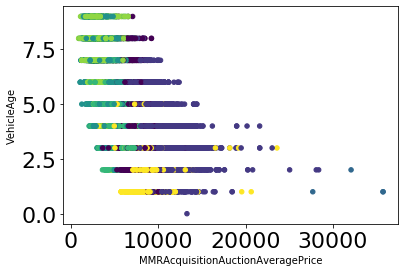

In [48]:
plt.scatter(pdf['MMRAcquisitionAuctionAveragePrice'], pdf['VehicleAge'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('MMRAcquisitionAuctionAveragePrice')
plt.ylabel('VehicleAge')
plt.show()

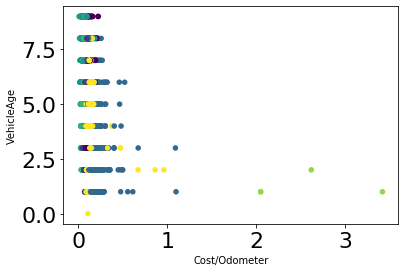

In [55]:
plt.scatter(pdf['Cost/Odometer'], pdf['VehicleAge'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('Cost/Odometer')
plt.ylabel('VehicleAge')
plt.show()

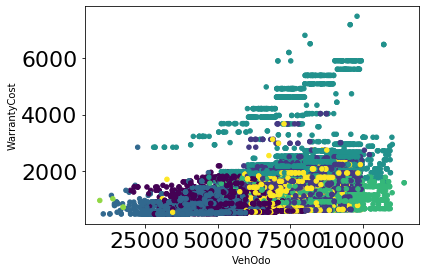

In [56]:
plt.scatter(pdf['VehOdo'], pdf['WarrantyCost'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehOdo')
plt.ylabel('WarrantyCost')
plt.show()

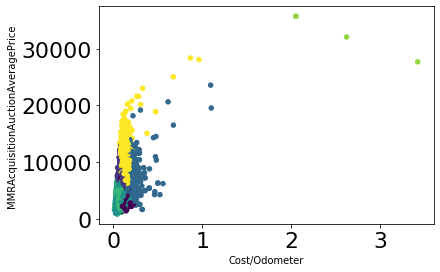

In [57]:
plt.scatter(pdf['Cost/Odometer'], pdf['MMRAcquisitionAuctionAveragePrice'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('Cost/Odometer')
plt.ylabel('MMRAcquisitionAuctionAveragePrice')
plt.show()

Centroids

In [58]:
kmeans.cluster_centers_

array([[-5.19335552e-02, -7.65769428e-01, -4.74256415e-01,
        -4.14235170e-01, -6.16222140e-01,  4.03001072e-02],
       [-2.21089823e-01,  5.51528559e-01,  3.87030170e-01,
         3.57677521e-01,  4.68286462e-01, -1.39397366e-01],
       [-1.10193699e+00, -1.49512486e+00,  5.72814587e-01,
         4.97004275e-01, -6.98577972e-01,  1.33401204e+00],
       [ 1.42942495e+00,  7.32962702e-01, -1.07684439e+00,
        -9.25485106e-01,  2.05597666e+00, -8.26809973e-01],
       [ 7.68046176e-01,  5.99579157e-01, -9.98420996e-01,
        -1.02002415e+00, -1.76865698e-01, -8.57177321e-01],
       [-1.67960746e+00, -3.87045380e+00,  1.10804933e+01,
         1.60018424e+01, -7.04923086e-01,  5.57046431e+01],
       [-3.31840222e-01,  2.97343817e-01,  1.48414944e+00,
         1.47160779e+00, -7.74867379e-02,  5.89286657e-01]])

Two dimentional view with the centroids

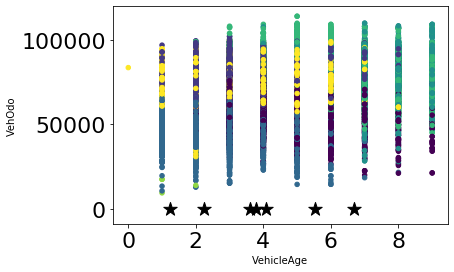

In [59]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehicleAge'], pdf['VehOdo'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 5], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehicleAge')
plt.ylabel('VehOdo')
plt.show()

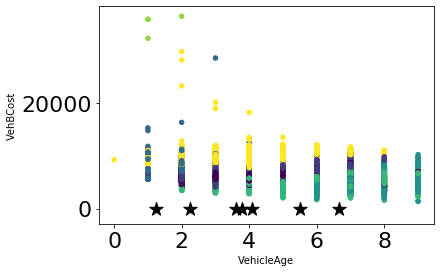

In [60]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehicleAge'], pdf['VehBCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 5], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehicleAge')
plt.ylabel('VehBCost')
plt.show()

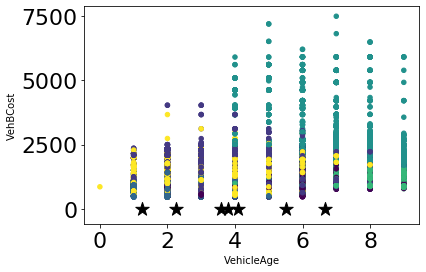

In [61]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehicleAge'], pdf['WarrantyCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 5], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehicleAge')
plt.ylabel('VehBCost')
plt.show()

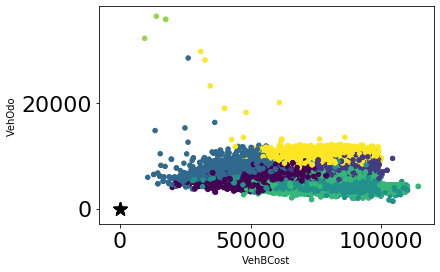

In [66]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehOdo'], pdf['VehBCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 5], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehOdo')
plt.ylabel('VehBCost')
plt.show()

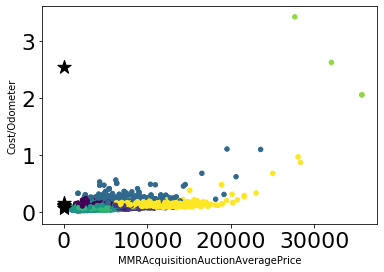

In [68]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['MMRAcquisitionAuctionAveragePrice'], pdf['Cost/Odometer'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 5], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('MMRAcquisitionAuctionAveragePrice')
plt.ylabel('Cost/Odometer')
plt.show()

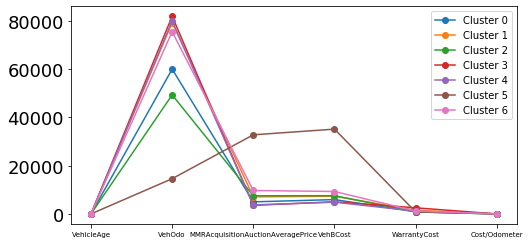

In [79]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xticks(range(0, len(pdf.columns)), pdf.columns, fontsize=7)
plt.legend(fontsize=10)
plt.show()

In this analysis we can see one cluster composed by 4 elements, maybe this is the influece of the outliers, so we have to remake the analysis without this outliers and then we can try to find some pattern in the cluster

Now we can add the laber of the cluster to our database.

In [87]:
df_kmeans = pd.read_csv("Training_DU_Clustering_forAnalysis1.csv", skipinitialspace=True, sep=',')
df_kmeans['labels_KMeans'] = kmeans.labels_
df_kmeans

,PurchDate,Model,SubModel,VehYear,RefId,IsBadBuy,Auction,VehicleAge,Make,Engine,...,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,Doors,TotalPrice,Cost/Odometer,labels_KMeans
0,2009-07-28,1500 RAM,EXT CAB,2001,61608,1,ADESA,8,DODGE,5.2L,...,23359,91752,CA,4315.0,0,1054,4D,5369.0,0.078288,4
1,2009-07-28,1500 RAM,EXT CAB,2001,61608,1,ADESA,8,DODGE,5.2L,...,23359,91752,CA,4315.0,0,1054,4D,5369.0,0.078288,4
2,2009-02-25,1500 RAM,MEGA CAB,2006,50261,0,MANHEIM,3,DODGE,5.7L,...,19662,78219,TX,10835.0,0,920,NaN,11755.0,0.148980,6
3,2009-01-12,1500 RAM,MEGA CAB,2006,33703,0,MANHEIM,3,DODGE,5.7L,...,19619,34761,FL,11515.0,0,983,NaN,12498.0,0.142777,6
4,2009-01-12,1500 RAM,MEGA CAB,2006,33703,0,MANHEIM,3,DODGE,5.7L,...,19619,34761,FL,11515.0,0,983,NaN,12498.0,0.142777,6
5,2010-12-08,1500 RAM,QUAD CAB,2002,23228,1,MANHEIM,8,DODGE,4.7L,...,18880,29532,SC,9110.0,0,1283,NaN,10393.0,0.103773,1
6,2009-07-31,1500 RAM,QUAD CAB,2002,60207,1,ADESA,7,DODGE,5.9L,...,18881,37771,TN,6455.0,0,1054,NaN,7509.0,0.110626,0
7,2009-05-28,1500 RAM,QUAD CAB,2002,22396,0,MANHEIM,7,DODGE,4.7L,...,17212,76040,TX,8985.0,0,1283,NaN,10268.0,0.103236,1
8,2009-06-25,1500 RAM,QUAD CAB,2002,71946,0,ADESA,7,DODGE,4.7L,...,3453,80817,CO,8100.0,0,1220,NaN,9320.0,0.109116,4
9,2009-07-10,1500 RAM,QUAD CAB,2002,36524,0,MANHEIM,7,DODGE,4.7L,...,20833,75236,TX,7785.0,0,1220,NaN,9005.0,0.097849,4


Output

In [ ]:
df_kmeans.to_csv(path_or_buf='df_KMeanscsv' ,index=False)